## Titanic Data Exploration ##

***

Over the past several weeks, you've learned the code about how to explore and manipulate a dataset. Now it's time to practice what you've learned on a real-world dataset. 

***

### Titanic Dataset

The titanic dataset holds information about the passengers on the titanic. This includes passenger name, characteristics, and if they survived the accident. The dataset has the following columns:

    * pclass = passenger class; 1 = first class, 2 = second class, 3 = third class
    * survived = passenger survival; 1 = survived, 0 = did not survive
    * name = passenger name
    * sex = sex of passenger
    * age = age of passenger
    * sibsp = # of siblings / spouses aboard the Titanic
    * parch = # of parents / children aboard the Titanic
    * ticket = ticket number
    * fare = fare paid by passenger
    * cabin = passenger cabin
    * embarked = port of embarkation; C = Cherbourg, Q = Queenstown, S = Southampton
    * boat = lifeboat assignment 
    * body = recovered body number
    * home dest = anticipated home destination 
    
If you need some additional motivation before starting, please visit: https://www.youtube.com/watch?v=3gK_2XdjOdY

### How to work through the dataset:

Follow the prompts below to explore, manipulate, and visualize aspects of the dataset. Working with data takes time, so take your time as you start with a messy dataset and turn it into something that shows meaningful visualizations. 

***


### Import Libraries and Dataset

* Review the entire notebook to determine what you will be expected to do - then, import the necessary libraries
* Import the titanic.xlsx dataset

In [6]:
import pandas as pd
import numpy as np
import seaborn as sea
import io
from matplotlib import pyplot as plt

In [7]:
from google.colab import files

uploaded = files.upload()

Saving titanic.xlsx to titanic (1).xlsx


In [29]:
df = pd.read_excel(io.BytesIO(uploaded["titanic.xlsx"]))

### Determine the Characteristics of the Dataset

   * How many columns are in this dataset?
   * How many rows are in this dataset?
   * What types of data are in each column? Does this make sense with that you know about that column?
   * Which variables are numeric? Which variables are categorical? What other variables are left outside of these two groups?
   * Which variable could be considered a 'dependent' variable?

In [30]:
print("There are", len(df.columns), "columns in this dataset")
print("There are", df.shape[0], "rows in this dataset")

There are 14 columns in this dataset
There are 1309 rows in this dataset


In [31]:
df.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [32]:
# The Plcass, Survived, Age, Sibsp, Parch, Fare, Body are all numerical varibles 
# The Name, Sex, Cabin, Embarked, Boat, Home.Dest are all categorical varibales
#Two other outlier variables are name and home dest as neither are categorical or numerical

### Identify the Missing Data in the Dataset

   * Is there any missing data?
   * Which columns have any missing data?
   * Which column has the most missing information? Which column has the least?

In [33]:
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [34]:
#Body column has the most missing data with 1188 missing fields, and fare has the least missing data with 1

### Handling the Missing Data in the Dataset

   * Remove the columns with excessive missing data (any column missing greater than 500 rows)
   * When there is very little missing data, we can make replacements. Replace the missing data for the "embarked" column with the most common embarkation point. 
   * Replace the missing data in "fare" with the average fare of the entire sample. 
   * Remove the rows in the dataset that has missing "age" data. 
   * Recheck is there is any data missing in the dataset. 

In [35]:
df.drop(columns = ["cabin","boat","body","home.dest"])

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,S
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,S
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,S
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,S
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,S
...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,C
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,C
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,C
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,C


In [36]:
df["embarked"].value_counts()
df['embarked'] = df["embarked"].fillna('S')
df.isnull().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        0
boat          823
body         1188
home.dest     564
dtype: int64

In [37]:
df["fare"].mean()
df['fare'] = df['fare'].fillna(df['fare'].mean())

In [38]:
df = df.dropna(subset = ["age"])
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        774
embarked       0
boat         629
body         926
home.dest    361
dtype: int64

In [39]:
df.isnull().sum()

pclass         0
survived       0
name           0
sex            0
age            0
sibsp          0
parch          0
ticket         0
fare           0
cabin        774
embarked       0
boat         629
body         926
home.dest    361
dtype: int64

### Creating Columns and Replacing Labels

   * Create descriptive labels for the categorical columns: pclass, survived, and embarked. Instead of the coding that shows in the dataset, create labels to describe what each category represents (i.e. in the embarked column S = Southhampton)
   * Create a new column called "Titanic Passenger" and make all values 1
   * Create a new column called "Family Size" - this column should equal the total number of family members each passenger was traveling with.
   * Create a column called "Travel Alone" - this column should be 1 if the passenger was traveling alone, and 0 if the passenger was traveling with family. 
   * Create a column called "Has Caregiver" - this column should have a value of 1 if a passenger is less than 13-years old AND the passenger is traveling with at least one family member, otherwise the value should be 0. 
   * Create a column called "Crew" - this column should be 1 if the passenger paid 0 dollars for their ticket, and 0 otherwise. 
   * Create a column called "Age Group" to group passengers by their age (create five categories: infant, child, teen, adult, senior). You can use bins to complete this (or any other method you like). You define the cutoff points for each group you create. 
   
After create new columns, replace the basic coding "0/1" with meaningful labels. 

In [40]:
df['embarked'] = df['embarked'].replace(['S','Q','C'],['S = Southhampton','Q = Queenstown','C = Cherbourg'])
df['survived'] = df['survived'].replace([1, 0],['1 = survived','0 = did not survive'])
df['pclass'] = df['pclass'].replace([1, 2, 3], ['1 = first class', '2 = second class', '3 = third class'])
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1 = first class,1 = survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S = Southhampton,2,NaN,"St Louis, MO"
1,1 = first class,1 = survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S = Southhampton,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1 = first class,0 = did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1 = first class,0 = did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1 = first class,0 = did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [41]:
df['titanic passenger'] = 1
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titanic passenger
0,1 = first class,1 = survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S = Southhampton,2,NaN,"St Louis, MO",1
1,1 = first class,1 = survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S = Southhampton,11,NaN,"Montreal, PQ / Chesterville, ON",1
2,1 = first class,0 = did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1
3,1 = first class,0 = did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",1
4,1 = first class,0 = did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1


In [42]:
df["family size"] = df['sibsp'] + df['parch']
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titanic passenger,family size
0,1 = first class,1 = survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S = Southhampton,2,NaN,"St Louis, MO",1,0
1,1 = first class,1 = survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S = Southhampton,11,NaN,"Montreal, PQ / Chesterville, ON",1,3
2,1 = first class,0 = did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3
3,1 = first class,0 = did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3
4,1 = first class,0 = did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3


In [43]:
df["travel alone"] = np.where(df["family size"] > 0, 0,1)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titanic passenger,family size,travel alone
0,1 = first class,1 = survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S = Southhampton,2,NaN,"St Louis, MO",1,0,1
1,1 = first class,1 = survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S = Southhampton,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0
2,1 = first class,0 = did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0
3,1 = first class,0 = did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,0
4,1 = first class,0 = did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0


In [44]:
df["has caregiver"] = np.where(((df["age"] < 13) & (df["travel alone"] == 0)), 1, 0)
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titanic passenger,family size,travel alone,has caregiver
0,1 = first class,1 = survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S = Southhampton,2,NaN,"St Louis, MO",1,0,1,0
1,1 = first class,1 = survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S = Southhampton,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,1
2,1 = first class,0 = did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,1
3,1 = first class,0 = did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,0,0
4,1 = first class,0 = did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,0


In [45]:
df["crew"] = np.where(df["fare"] == 0, 1, 0)
df['crew'].value_counts()

0    1038
1       8
Name: crew, dtype: int64

In [46]:
bins = [0, 2, 13, 18, 65, 130]
bin_names = ["Infant", "Child", "Teen", "Adult", "Senior"]

df["age group"] = pd.cut(df["age"], bins, labels = bin_names)

df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titanic passenger,family size,travel alone,has caregiver,crew,age group
0,1 = first class,1 = survived,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S = Southhampton,2,NaN,"St Louis, MO",1,0,1,0,0,Adult
1,1 = first class,1 = survived,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S = Southhampton,11,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,1,0,Infant
2,1 = first class,0 = did not survive,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,1,0,Infant
3,1 = first class,0 = did not survive,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,135.0,"Montreal, PQ / Chesterville, ON",1,3,0,0,0,Adult
4,1 = first class,0 = did not survive,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S = Southhampton,NaN,NaN,"Montreal, PQ / Chesterville, ON",1,3,0,0,0,Adult


In [75]:
#df["crew"].value_counts()
df['sibsp'] = df['sibsp'].replace([0, 1 , 2, 3, 4, 5, 6, 7, 8],['No siblings/spouce aboard', '1 siblings/spouce aboard ','2 siblings/spouce aboard','3 siblings/spouce aboard', '4 siblings/spouce aboard', '5 siblings/spouce aboard', '6 siblings/spouce aboard', '7 siblings/spouce aboard', '8 siblings/spouce aboard'])
df['parch'] = df['parch'].replace([0, 1, 2, 3, 4, 5, 6],['No parent/child aboard','1 parent/child aboard', '2 parent/child aboard', '3 parent/child aboard', '4 parent/child aboard', '5 parent/child aboard', '6 parent/child aboard' ])
df['titanic passenger'] = df['titanic passenger'].replace([1], ['Is a Titanic Passenger'])
df['family size'] = df['family size'].replace([0, 1, 2, 3, 4, 5, 6, 7, 8 , 9, 10],['no family members','1 family member', '2 family members', '3 family members', '4 family members', '5 family members', '6 family members', '7 family members','8 family members','9 family members', '10 family members' ])
df['travel alone'] = df['travel alone'].replace([1, 0], ['traveling alone', 'traveling with family'])
df['has caregiver'] = df['has caregiver'].replace([1, 0], ['has caregiver', 'no caregiver'])
df['crew'] = df['crew'].replace([1, 0], ['crew memeber', 'not a crew memeber'])



### Determine Frequencies of Groups

* How many passengers fall into each category? Determine how many passengers fall into each group for <b>each</b> categorical vairable (including the ones you just created). 

In [76]:
df.head(1)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,titanic passenger,family size,travel alone,has caregiver,crew,age group
0,1 = first class,1 = survived,"Allen, Miss. Elisabeth Walton",female,29.0,No siblings/spouce aboard,No parent/child aboard,24160,211.3375,B5,S = Southhampton,2,NaN,"St Louis, MO",Is a Titanic Passenger,No Family Members,traveling alone,no caregiver,not a crew memeber,Adult


In [48]:
df["pclass"].value_counts()

3 = third class     501
1 = first class     284
2 = second class    261
Name: pclass, dtype: int64

In [77]:
df["survived"].value_counts()

0 = did not survive    619
1 = survived           427
Name: survived, dtype: int64

In [78]:
df["sibsp"].value_counts()

No siblings/spouce aboard    685
1 siblings/spouce aboard     280
2 siblings/spouce aboard      36
4 siblings/spouce aboard      22
3 siblings/spouce aboard      16
5 siblings/spouce aboard       6
8 siblings/spouce aboard       1
Name: sibsp, dtype: int64

In [49]:
df["sex"].value_counts()

male      658
female    388
Name: sex, dtype: int64

In [79]:
df["parch"].value_counts()

No parent/child aboard    768
1 parent/child aboard     160
2 parent/child aboard      97
3 parent/child aboard       8
5 parent/child aboard       6
4 parent/child aboard       5
6 parent/child aboard       2
Name: parch, dtype: int64

In [80]:
df["embarked"].value_counts()

S = Southhampton    784
C = Cherbourg       212
Q = Queenstown       50
Name: embarked, dtype: int64

In [81]:
df["titanic passenger"].value_counts()

Is a Titanic Passenger    1046
Name: titanic passenger, dtype: int64

In [83]:
df["family size"].value_counts()

No Family Members    590
1 Family Member      206
2 Family Members     144
3 family members      39
5 family members      25
4 family members      17
6 family members      16
7 family members       8
10 family members      1
Name: family size, dtype: int64

In [82]:
df["travel alone"].value_counts()

traveling alone          590
traveling with family    456
Name: travel alone, dtype: int64

In [84]:
df["has caregiver"].value_counts()

no caregiver     955
has caregiver     91
Name: has caregiver, dtype: int64

In [85]:
df["crew"].value_counts()

not a crew memeber    1038
crew memeber             8
Name: crew, dtype: int64

In [105]:
df["age group"].value_counts()

Adult     843
Teen       94
Child      65
Infant     34
Senior     10
Name: age group, dtype: int64

### Determine the Distribution of Numeric Data

* What are the summary statistics for <b>each</b> numeric variable in the dataset? Summary statistics include:
    * Mean
    * Median
    * Mode
    * Standard Deviation
    * Range

In [98]:
print("AGE SUMMARY STATISTICS")
print("mean:",df['age'].mean())
print("median:",df['age'].median())
print("mode:",df['age'].mode())
print("standard deviation:",df['age'].std())
print("range:", (df['age'].max()-df['age'].min()))

AGE SUMMARY STATISTICS
mean: 29.8811345124283
median: 28.0
mode: 0    24.0
dtype: float64
standard deviation: 14.413499699923594
range: 79.8333


In [103]:
print("FARE SUMMARY STATISTICS")
print("mean:",df['fare'].mean())
print("median:",df['fare'].median())
print("mode:",df['fare'].mode())
print("standard deviation:",df['fare'].std())
print("range:", (df['fare'].max()-df['fare'].min()))

FARE SUMMARY STATISTICS
mean: 36.68283879472418
median: 15.8
mode: 0    13.0
dtype: float64
standard deviation: 55.70595916349577
range: 512.3292


### Relationships between Variables

* Determine the relationship between each variable and the variable "survived". This is our primary variable of interest -- did this passenger survive the accident? Did the characteristics of the passenger have any relationship with their survival?
    * <b>pclass</b>: how many survivors are in each passenger class? does a pattern emerge? which class has the most survivors? which has the least?
    * <b>sex</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>age</b>: how does the average age of the passenger differ based on survival group? 
    * <b>age group</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>family size</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>travel alone</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>crew</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>has caregiver</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    * <b>fare</b>: how does the average fare the passenger paid differ based on survival group? 
    * <b>embarked</b>: how many survivors are in each variable group? does a pattern emerge? which group has the most survivors? which has the least?
    
Based on what you learn working through this section, make (2) statements about what characteristics of passenger most influenced their survival.

In [114]:
df[df["survived"] == '1 = survived'].value_counts(['pclass'])
# Going from 1st to 3rd class we see a decrease in survivors

pclass          
1 = first class     181
3 = third class     131
2 = second class    115
dtype: int64

In [116]:
df[df["survived"] == '1 = survived'].value_counts(['sex'])
# More females survived than males

sex   
female    292
male      135
dtype: int64

In [123]:
df[df["survived"] == '1 = survived'].value_counts(['age'])

age    
24.0000    22
22.0000    20
30.0000    15
18.0000    14
45.0000    14
           ..
32.5000     1
0.4167      1
11.0000     1
0.6667      1
80.0000     1
Length: 70, dtype: int64

In [124]:
df[df["survived"] == '1 = survived'].value_counts(['age group'])
#Adults survived the most, while seniors survived the least

age group
Adult        330
Teen          38
Child         36
Infant        21
Senior         2
dtype: int64

In [125]:
df[df["survived"] == '1 = survived'].value_counts(['family size'])
# People with no family memebers survived the most, people with 6 family memebers survived the least

family size      
No Family Members    188
1 Family Member      113
2 Family Members      81
3 family members      30
4 family members       6
5 family members       5
6 family members       4
dtype: int64

In [126]:
df[df["survived"] == '1 = survived'].value_counts(['travel alone'])
#People traveling with family survived more than people who traveled alone

travel alone         
traveling with family    239
traveling alone          188
dtype: int64

In [127]:
df[df["survived"] == '1 = survived'].value_counts(['crew'])

crew              
not a crew memeber    425
crew memeber            2
dtype: int64

In [128]:
df[df["survived"] == '1 = survived'].value_counts(['has caregiver'])
#those with no caregiver survived more with those who did

has caregiver
no caregiver     375
has caregiver     52
dtype: int64

In [129]:
df[df["survived"] == '1 = survived'].value_counts(['fare'])
#hard to determine pattern


fare   
26.0000    18
13.0000    16
10.5000    12
7.9250      9
26.5500     9
           ..
66.6000     1
71.0000     1
71.2833     1
75.2500     1
9.2250      1
Length: 167, dtype: int64

In [130]:
df[df["survived"] == '1 = survived'].value_counts(['embarked'])
#Those who traveled from Southhamptop survived more than those who traveled from Queenstown

embarked        
S = Southhampton    282
C = Cherbourg       132
Q = Queenstown       13
dtype: int64

### Visualize your Results

* Using the most interesting (from your POV) results from the above section, create (3) visualizations to illustrate the results. 
* Create a barplot to show the variation in average age across passenger class. On average, which passenger class has the oldest passengers?
* Create a violin plot to show the distribution of age across passenger class. 

In [131]:
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

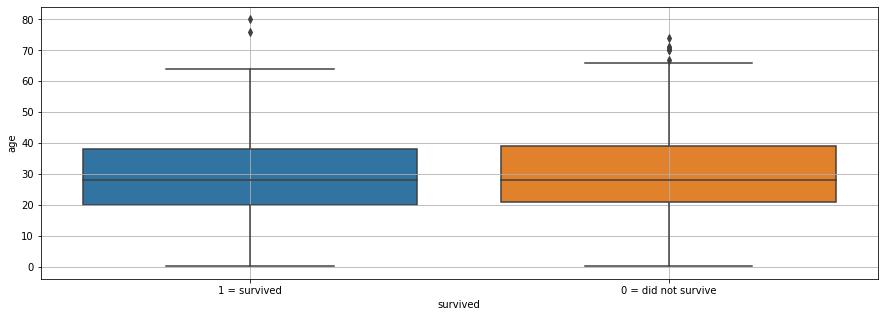

In [137]:
plt.figure(figsize=(15,5)) 

sns.boxplot(x = df["survived"], y = df["age"])

plt.grid()

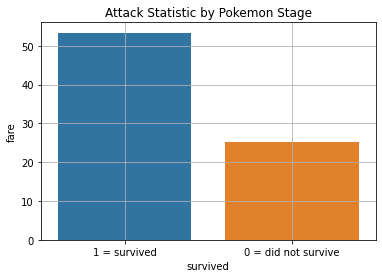

In [143]:
sns.barplot(data = df, x = "survived", y = "fare", ci = None)

plt.title('Survived by Fare COst')
plt.grid()

Text(0.5, 1.0, 'Frequency of Pokemon Type across Stage')

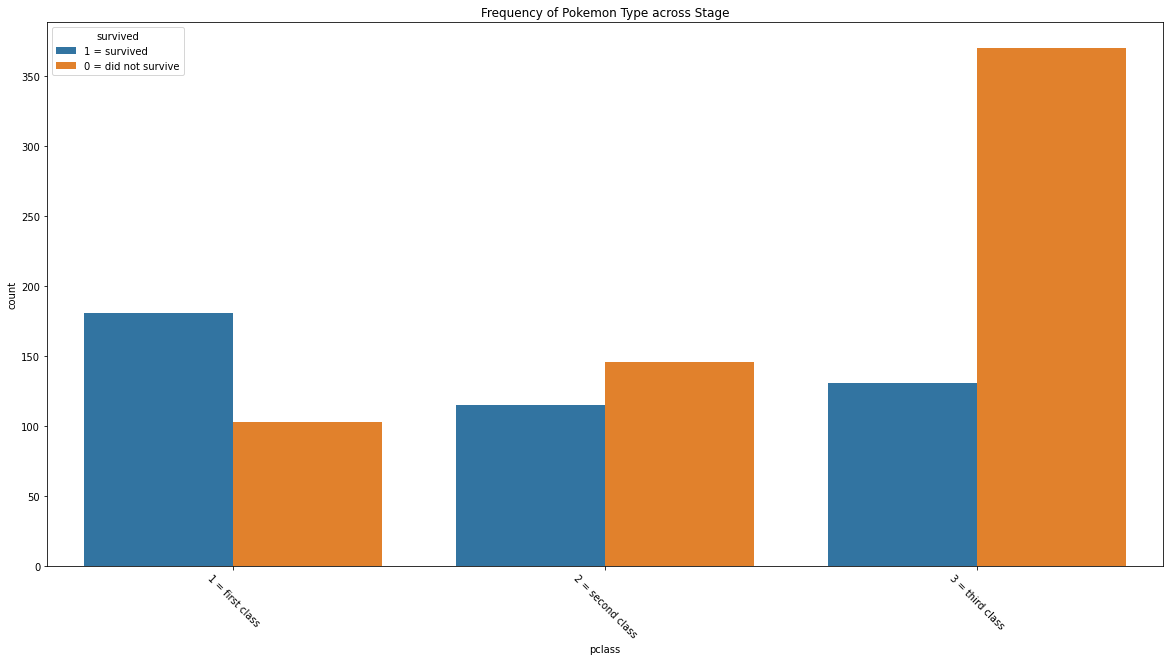

In [144]:
plt.figure(figsize=(20,10))

sns.countplot(data = df, x = "pclass", hue = "survived")

plt.xticks(rotation = -45)
plt.title('Frequency of Passenger Class across Survival Status')

Text(0.5, 1.0, 'Frequency of Pokemon Type across Stage')

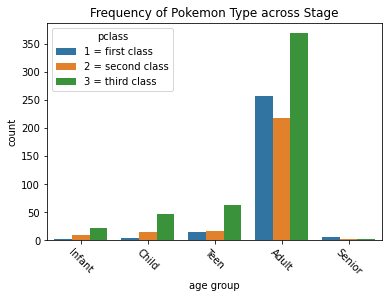

In [146]:

sns.countplot(data = df, x = "age group", hue = "pclass")

plt.xticks(rotation = -45)
plt.title('Frequency of Pokemon Type across Stage')

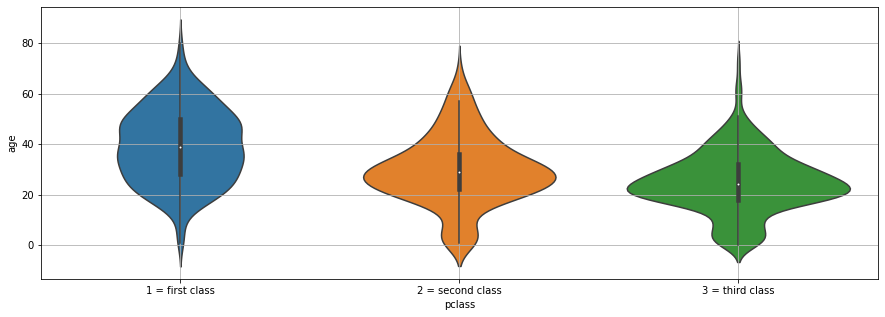

In [147]:
plt.figure(figsize=(15,5))

sns.violinplot(x = df["pclass"], y = df["age"])

plt.grid()